In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
data.drop(columns=['education'],inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


In [5]:
data.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [6]:
data['cigsPerDay'].fillna(value=0.0,inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4238 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


In [8]:
data.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [9]:
numerical_columns=['BPMeds','totChol','BMI','glucose','heartRate']

In [10]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
data[numerical_columns]=imputer.fit_transform(data[numerical_columns])


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4238 non-null   float64
 4   BPMeds           4238 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4238 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4238 non-null   float64
 12  heartRate        4238 non-null   float64
 13  glucose          4238 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


In [12]:
data['TenYearCHD'].value_counts()/len(data)

TenYearCHD
0    0.848042
1    0.151958
Name: count, dtype: float64

In [13]:
X=data.drop(columns=['TenYearCHD'])
Y=data['TenYearCHD']

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(scaled_X,Y,train_size=0.80,stratify=Y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3390, 14), (848, 14), (3390,), (848,))

In [17]:
from sklearn.linear_model import LogisticRegression as LR
classifier=LR(class_weight='balanced')

In [18]:
classifier.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

In [19]:
predicted_values=classifier.predict(x_test)
predicted_probabilities=classifier.predict_proba(x_test)

In [20]:
predicted_values

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [22]:
predicted_probabilities,predicted_probabilities.shape

(array([[0.55378698, 0.44621302],
        [0.45180056, 0.54819944],
        [0.61057728, 0.38942272],
        ...,
        [0.53310012, 0.46689988],
        [0.54764895, 0.45235105],
        [0.73643261, 0.26356739]]),
 (848, 2))

In [23]:
classifier.score(x_test,y_test)

0.6804245283018868

In [25]:
#calculating Precision
from sklearn.metrics import precision_score
precision=precision_score(y_test,predicted_values)
precision

0.26644736842105265

In [26]:
from sklearn.metrics import recall_score
recall=recall_score(y_test,predicted_values)
recall

0.627906976744186

In [27]:
from sklearn.metrics import f1_score
F1=f1_score(y_test,predicted_values)
F1

0.37413394919168597

In [29]:
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision,recall,f1,support=PRF_summary(y_test,predicted_values)

In [30]:
precision

array([0.91176471, 0.26644737])

In [31]:
recall

array([0.68984701, 0.62790698])

In [32]:
f1

array([0.78543151, 0.37413395])

In [33]:
from sklearn.metrics import classification_report
k=classification_report(y_test,predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.91      0.69      0.79       719
           1       0.27      0.63      0.37       129

    accuracy                           0.68       848
   macro avg       0.59      0.66      0.58       848
weighted avg       0.81      0.68      0.72       848



In [35]:
from sklearn.metrics import precision_recall_curve
precision_points,recall_points,threshold_points=precision_recall_curve(y_test,predicted_values)
precision_points.shape,recall_points.shape,threshold_points.shape

((3,), (3,), (2,))

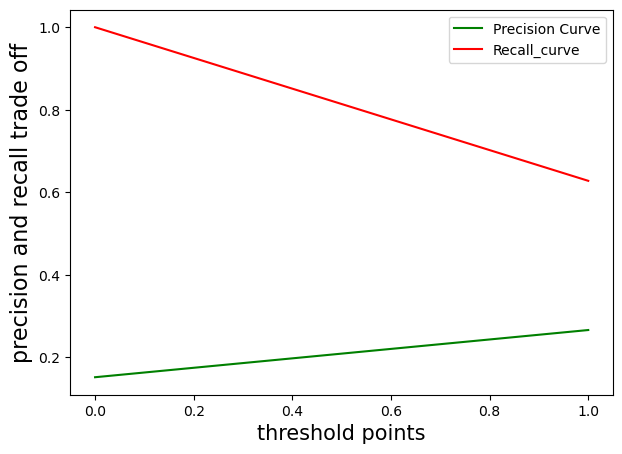

In [38]:
plt.figure(figsize=(7,5),dpi=100)
plt.plot(threshold_points,precision_points[:-1],color="g",label="Precision Curve")
plt.plot(threshold_points,recall_points[:-1],color="r",label="Recall_curve")
plt.xlabel('threshold points',fontsize=15)
plt.ylabel("precision and recall trade off",fontsize=16)
plt.legend()

In [39]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold=roc_curve(y_test,predicted_probabilities[:,1])

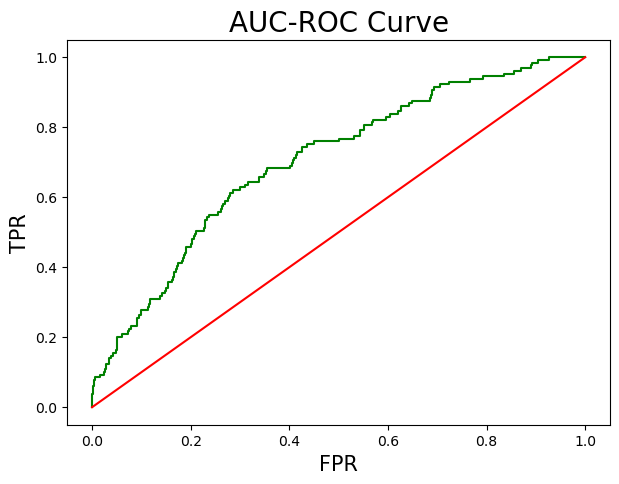

0.7029034727388384

In [40]:
plt.figure(figsize=(7,5),dpi=100)
plt.plot(fpr,tpr,color="g")
plt.plot([0,1],[0,1],label='baseline',color="r")
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)
plt.title('AUC-ROC Curve',fontsize=20)
plt.show()
roc_auc_score(y_test,predicted_probabilities[:,1])

In [41]:
c=classifier.coef_.reshape(-1)
x=X.columns

coeff_plot=pd.DataFrame({ 'Coefficients':c,
                         'variable':x})

coeff_plot=coeff_plot.sort_values(by='Coefficients')
coeff_plot.head()

,Coefficients,variable
10,-0.031042,diaBP
12,-0.004063,heartRate
4,0.005047,BPMeds
11,0.037674,BMI
5,0.055025,prevalentStroke


Text(0.5, 1.0, 'Coefficient plot')

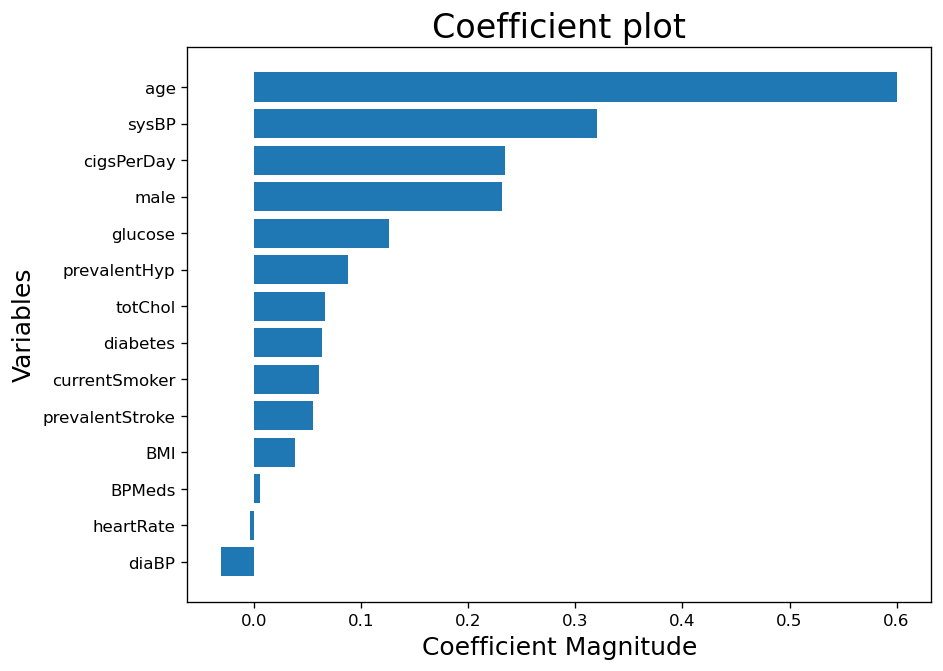

In [42]:
plt.figure(figsize=(8, 6), dpi=120)
plt.barh( coeff_plot['variable'] , coeff_plot['Coefficients'] )
plt.xlabel( "Coefficient Magnitude", fontsize = 15)
plt.ylabel('Variables', fontsize = 15)
plt.title('Coefficient plot', fontsize = 20)